In [1]:
import sys
sys.path.append("../")

In [2]:
%pylab inline

import logging as log
import fiona, shapely
from shapely.geometry import LineString, MultiPolygon
from shapely.ops import polygonize
import mappy as mpy
import geopandas


mpl.rcParams['figure.figsize'] = [12, 10.0]


# vector layer with contacts
contacts = "../input_data/contacts" # contacts also contain the boundind box.


# here are a vector layer with points. each points need to have a field with an unique id for each geological unit
unit_id = "../input_data/unit_id"
unit_uuid_name = "unit_name" # the name of the field to use to populate the map.

# output data - geopackage
outputfname = "./output-map-data.gpkg"

dist = 1.0 # extend of 1 meters all the extreme segments of contacts - needed to ensure proper intersections

import os # we also use this example for generating images for the readme.
figdir = "../images/"
os.makedirs(figdir, exist_ok=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
cts= geopandas.GeoDataFrame.from_file(contacts)
units = geopandas.GeoDataFrame.from_file(unit_id)

In [4]:
cts = cts[cts.geometry.values != None] # remove null geometries

# plot the input dataset - contacts and points

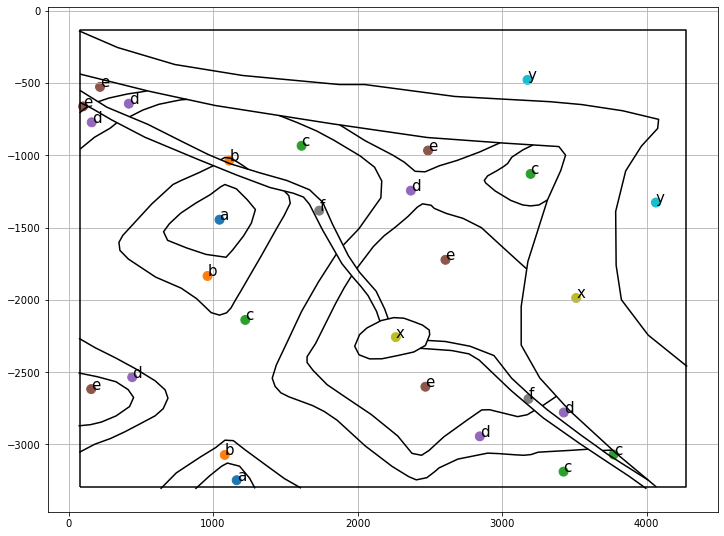

In [5]:
mpy.plot_contacts_and_units_points(cts, units, unit_uuid_name)

In [6]:
out = mpy.extend_lines(cts, 22)

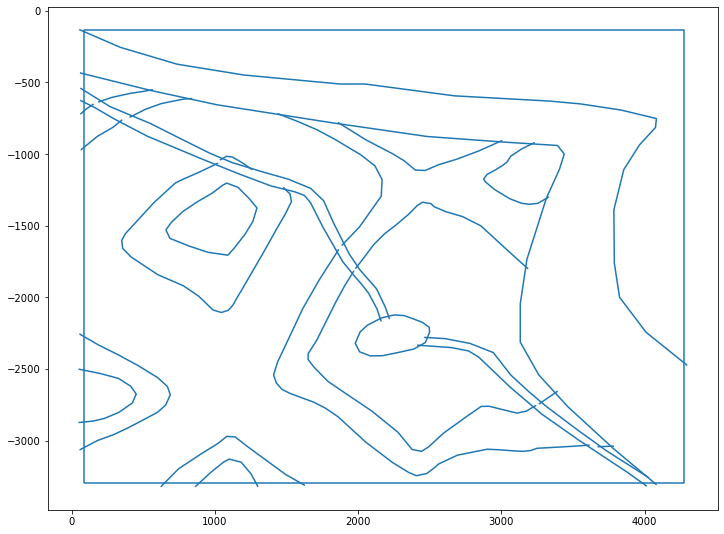

In [7]:
out.plot() # have a look at the extended lines dataset

# Create a fast view of intersections so we can evaluate if the extension worked out fine

In [8]:


intersections = mpy.compute_self_intersections_points(cts)


# and plot 

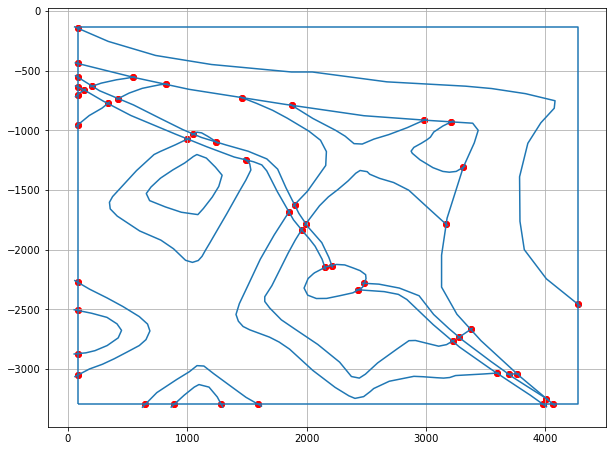

In [9]:
figure(figsize=(10,10))
intersections.plot(color="r", ax=gca())
out.plot(ax=gca())
grid()

# and save the intersection in the output geopackage for external evaluation

In [10]:
# intersections.to_file(outputfname , layer="intersections", driver="GPKG")

# now go ahead with polygonize

In [11]:

polygons = mpy.polygonize(out)

# do a plot

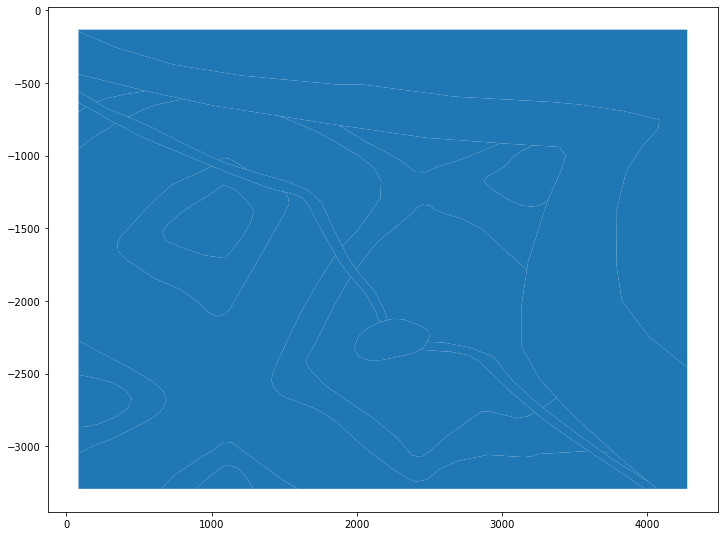

In [12]:
polygons.plot()

# and save to output geopackage

In [13]:
polygons.to_file(outputfname , layer="polygons", driver="GPKG")

# now we associate a point for each polygon
It is very likely that we could do this with a spatial join, but this gives us better control for performing checks on the consistency

In [14]:
polygons = mpy.transfer_units_to_polygons(polygons, units, unit_uuid_name)

# see result for some validation

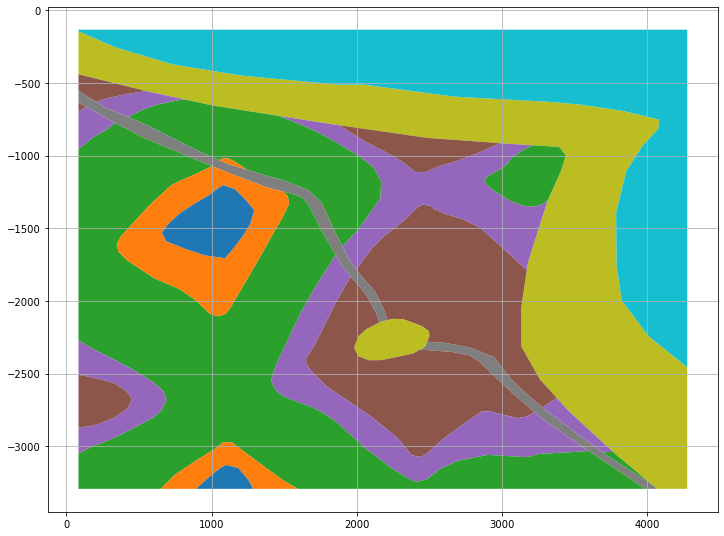

In [15]:
polygons.plot(column=unit_uuid_name)
grid()
savefig(os.path.join(figdir, "output_map.png"))

# save

In [16]:
polygons.to_file(outputfname , layer="polygons_labelled", driver="GPKG")